### import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier 
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline        

### Data Gathering

In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()              # statistical scenario of all the numerical column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
np.median(df['Glucose'])

117.0

In [12]:
df['Glucose']= df['Glucose'].replace({0: np.median(df['Glucose'])})
df['BloodPressure']= df['BloodPressure'].replace({0: np.median(df['BloodPressure'])})
df['SkinThickness']= df['SkinThickness'].replace({0: np.median(df['SkinThickness'])})
df['Insulin']= df['Insulin'].replace({0: np.median(df['Insulin'])})
df['BMI']= df['BMI'].replace({0: np.median(df['BMI'])})

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [20]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Split Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [27]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,72,23,30.5,32.0,0.304,21
618,9,112,82,24,30.5,28.2,1.282,50
346,1,139,46,19,83.0,28.7,0.654,22
294,0,161,50,23,30.5,21.9,0.254,65
231,6,134,80,37,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,23,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,23,30.5,42.4,0.205,29


In [29]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190.0,34.0,0.430,43
324,2,112,75,32,30.5,35.7,0.148,21
624,2,108,64,23,30.5,30.8,0.158,21
690,8,107,80,23,30.5,24.6,0.856,34
473,7,136,90,23,30.5,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,23,30.5,30.4,0.302,49
534,1,77,56,30,56.0,33.3,1.251,24
344,8,95,72,23,30.5,36.8,0.485,57
296,2,146,70,38,360.0,28.0,0.337,29


In [31]:
len(X_train)

614

In [33]:
len(y_test)

154

In [35]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [37]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

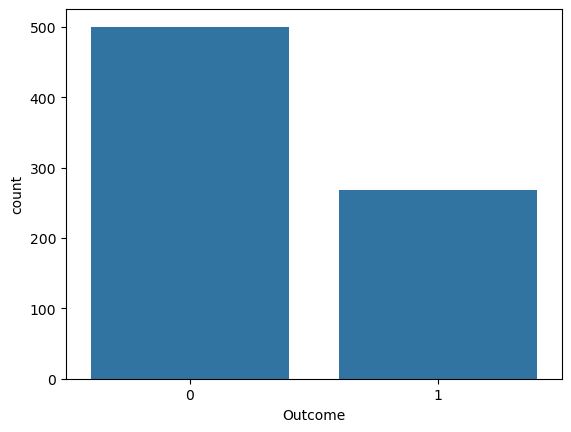

In [38]:
sns.countplot(x=df['Outcome'])
plt.show()

### Build Decision Tree Model

In [40]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

#### Testing Data Accuarcy

In [43]:
y_pred_test = dt_model.predict(X_test)
# y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7272727272727273

Classification report is
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.60      0.69      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154


Confusion matrix
 [[74 25]
 [17 38]]


In [44]:
77+22+18+37

154

In [49]:
116/154

0.7532467532467533

In [51]:
y_test[10:15]

667    1
212    0
199    1
265    0
760    0
Name: Outcome, dtype: int64

In [53]:
y_pred_test[10:15]

array([1, 1, 0, 1, 0], dtype=int64)

#### Training data accuracy

In [56]:
y_pred_train = dt_model.predict(X_train)
# y_pred_train[10:15]

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 1.0

Classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       213

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614


Confusion matrix
 [[401   0]
 [  0 213]]


#### Plot Decision Tree

In [59]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=df.columns,
                class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes20.png")

### HyperParameter Tuning

#### 1. GridSearchCV()

In [62]:
hyperparameters = {'criterion' : ["gini", "entropy"],
                   'max_depth' : np.arange(2,10),
                   'min_samples_split': np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)
                  }
dt_model = DecisionTreeClassifier()
gscv_dt_model = GridSearchCV(dt_model, hyperparameters, cv=5)
gscv_dt_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [63]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [67]:
dt_model = DecisionTreeClassifier(criterion= 'gini',
                     max_depth= 7,
                     min_samples_leaf= 15,
                        min_samples_split= 2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=15)

#### Testing Data Accuarcy

In [70]:
y_pred_test = dt_model.predict(X_test)
y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7597402597402597

Classification report is
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        99
           1       0.65      0.71      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.76      0.76       154


Confusion matrix
 [[78 21]
 [16 39]]


#### Training data accuracy

In [73]:
y_pred_train = dt_model.predict(X_train)
y_pred_train[10:15]

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 0.8387622149837134

Classification report is
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       401
           1       0.78      0.74      0.76       213

    accuracy                           0.84       614
   macro avg       0.82      0.82      0.82       614
weighted avg       0.84      0.84      0.84       614


Confusion matrix
 [[357  44]
 [ 55 158]]


#### Plot Decision Tree_Grid SearchCV

In [76]:
# plt.figure(figsize=(200,100))
# tree = plot_tree(decision_tree=best_model, feature_names=df.columns,
#                 class_names=['0', '1'], filled=True)
# plt.savefig("DT_diabetes_gscv.png")

#### 2. RandomizedSearchCv()

In [79]:
hyperparameters = {'criterion' : ["gini", "entropy"],
                   'max_depth' : np.arange(2,7),
                   'min_samples_split': np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,8)
                  }
dt_model = DecisionTreeClassifier()
rscv_dt_model = RandomizedSearchCV(dt_model, hyperparameters, cv=5)
rscv_dt_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [80]:
rscv_dt_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_depth': 4,
 'criterion': 'entropy'}

In [83]:
dt_model = DecisionTreeClassifier(criterion= 'gini',
                     max_depth= 4,
                     min_samples_leaf= 3,
                        min_samples_split= 5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=5)

#### Testing Data Accuarcy

In [86]:
y_pred_test = dt_model.predict(X_test)
y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7077922077922078

Classification report is
               precision    recall  f1-score   support

           0       0.84      0.68      0.75        99
           1       0.57      0.76      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154


Confusion matrix
 [[67 32]
 [13 42]]


#### Training data accuracy

In [89]:
y_pred_train = dt_model.predict(X_train)
# y_pred_train[10:15]

test_accuracy = accuracy_score(y_train, y_pred_train)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.8029315960912052

Classification report is
               precision    recall  f1-score   support

           0       0.91      0.77      0.84       401
           1       0.67      0.86      0.75       213

    accuracy                           0.80       614
   macro avg       0.79      0.82      0.79       614
weighted avg       0.83      0.80      0.81       614


Confusion matrix
 [[310  91]
 [ 30 183]]


#### Plot Decision Tree_Randomized SearchCV

In [94]:

plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=df.columns,
                class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes_rscv.png")

### Pruning

In [97]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [99]:
values = dt_model.cost_complexity_pruning_path(X_train, y_train)
# print(values, len(values))
ccp_alphas = values['ccp_alphas']
ccp_alphas

array([0.        , 0.00106603, 0.001396  , 0.00142508, 0.0014477 ,
       0.0014658 , 0.0014806 , 0.0014806 , 0.00153818, 0.00154595,
       0.00161498, 0.00196474, 0.00202179, 0.0020229 , 0.00207285,
       0.00217155, 0.00217155, 0.00217155, 0.00217155, 0.00221292,
       0.00229642, 0.00231062, 0.00236897, 0.002443  , 0.00246767,
       0.00246767, 0.00249039, 0.00260586, 0.00260586, 0.00260586,
       0.00265712, 0.002792  , 0.00281019, 0.00290808, 0.00291445,
       0.00297813, 0.00297817, 0.00363142, 0.00372424, 0.00386931,
       0.00390879, 0.0039119 , 0.00394305, 0.00402694, 0.00442207,
       0.00607942, 0.00716578, 0.00826586, 0.0096877 , 0.01598316,
       0.01627998, 0.02311097, 0.02322126, 0.08048715])

In [101]:
len(ccp_alphas)

54

In [103]:
train_accuracy = []
test_accuracy = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [104]:
train_accuracy

[1.0,
 0.998371335504886,
 0.996742671009772,
 0.995114006514658,
 0.993485342019544,
 0.99185667752443,
 0.988599348534202,
 0.988599348534202,
 0.9869706840390879,
 0.9853420195439739,
 0.9837133550488599,
 0.9804560260586319,
 0.9771986970684039,
 0.9723127035830619,
 0.9657980456026058,
 0.9560260586319218,
 0.9560260586319218,
 0.9560260586319218,
 0.9560260586319218,
 0.9495114006514658,
 0.9446254071661238,
 0.9429967426710097,
 0.9381107491856677,
 0.9332247557003257,
 0.9299674267100977,
 0.9299674267100977,
 0.9299674267100977,
 0.9250814332247557,
 0.9250814332247557,
 0.9250814332247557,
 0.9201954397394136,
 0.9185667752442996,
 0.9153094462540716,
 0.9104234527687296,
 0.9071661237785016,
 0.9039087947882736,
 0.8990228013029316,
 0.8925081433224755,
 0.8697068403908795,
 0.8648208469055375,
 0.8517915309446255,
 0.8387622149837134,
 0.8387622149837134,
 0.8355048859934854,
 0.8338762214983714,
 0.8241042345276873,
 0.7866449511400652,
 0.7817589576547231,
 0.781758957654

In [105]:
len(train_accuracy)

54

In [109]:
max(train_accuracy)

1.0

In [111]:
test_accuracy

[0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7207792207792207,
 0.7207792207792207,
 0.7272727272727273,
 0.7272727272727273,
 0.7337662337662337,
 0.7337662337662337,
 0.7337662337662337,
 0.7337662337662337,
 0.7272727272727273,
 0.7337662337662337,
 0.7402597402597403,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7467532467532467,
 0.7532467532467533,
 0.7662337662337663,
 0.7597402597402597,
 0.7467532467532467,
 0.7532467532467533,
 0.7532467532467533,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7012987012987013,
 0.7142857142

In [113]:
max(test_accuracy)

0.7727272727272727

In [115]:

test_accuracy.index(max(test_accuracy))

49

In [117]:
train_accuracy[30]

0.9201954397394136

In [119]:
ccp_alphas[30]

0.0026571172301238857

In [121]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, train_accuracy, label = "Train")
ax.plot(ccp_alphas, test_accuracy, label = "Test")
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuarcy")
ax.legend()

#### Model Building Pruning

In [124]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0027919962773382974)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0027919962773382974)

#### Test data accuracy_After Pruning

In [127]:
y_pred_test = dt_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7532467532467533

Classification report is
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion matrix
 [[79 20]
 [18 37]]


#### Train data accuracy_After Pruning

In [130]:
y_pred_train = dt_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 0.9185667752442996

Classification report is
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       401
           1       0.92      0.84      0.88       213

    accuracy                           0.92       614
   macro avg       0.92      0.90      0.91       614
weighted avg       0.92      0.92      0.92       614


Confusion matrix
 [[386  15]
 [ 35 178]]


#### Plot Decision Tree for Pruning

In [133]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=df.columns,
                class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes_CCP.png")

# Deployment of the model

In [136]:
# import pickle
#save trained model
# with open("dt_model.pkl","wb") as f:
#     pickle.dump(dt_model , f)

In [1]:
import joblib
joblib.dump(dt_model, "dt_model.pkl")

NameError: name 'dt_model' is not defined

In [138]:
# app_code = """
# import streamlit as st
# import numpy as np
# import pickle
# import joblib
# joblib.dump(model, "dt_model.pkl")

# st.set_page_config(page_title="Diabetes Prediction App", layout="centered")
# st.title("🩺 Diabetes Prediction App")
# st.write("Enter the patient details below to predict the likelihood of diabetes.")

# # Input fields (based on Pima Indians Diabetes dataset features)
# pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
# glucose = st.number_input("Glucose Level", min_value=0, max_value=300, value=120)
# blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=70)
# skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
# insulin = st.number_input("Insulin Level", min_value=0, max_value=900, value=80)
# bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0, step=0.1)
# diabetes_pedigree = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.5, value=0.5, step=0.01)
# age = st.number_input("Age", min_value=10, max_value=120, value=33)

# # Predict button
# if st.button("Predict"):
#     input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
#                             insulin, bmi, diabetes_pedigree, age]])
#     prediction = dt_model.predict(input_data)[0]
#     class_names = ['Diabitic', 'Non Diabitic']
#     st.success(f"🌼 Predicted class: {class_names[prediction]}")
# """
# with open("app.py", "w", encoding="utf-8") as f:
#     f.write(app_code)

# print("✅ Streamlit app created as app.py")


✅ Streamlit app created as app.py


In [140]:
import os
print(os.getcwd())


C:\Users\Admin\CDS\MLE\Decision_Tree


In [142]:
# first go on terminal/anaconda prompt 
# than paste the path that you get by the "os.getcwd()" and than paste streamlit run app.py 

In [144]:
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# import streamlit as st
# import numpy as np
# import pickle

# # Load the trained model
# with open("best_model.pkl", "rb") as f:
#     best_model = pickle.load(f)

# st.set_page_config(page_title="Diabetes Prediction App", layout="centered")
# st.title("🩺 Diabetes Prediction App")
# st.write("Enter the patient details below to predict the likelihood of diabetes.")

# # Input fields (based on Pima Indians Diabetes dataset features)
# pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
# glucose = st.number_input("Glucose Level", min_value=0, max_value=300, value=120)
# blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=70)
# skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
# insulin = st.number_input("Insulin Level", min_value=0, max_value=900, value=80)
# bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0, step=0.1)
# diabetes_pedigree = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.5, value=0.5, step=0.01)
# age = st.number_input("Age", min_value=10, max_value=120, value=33)

# # Predict button
# if st.button("Predict"):
#     input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
#                             insulin, bmi, diabetes_pedigree, age]])
    
#     prediction = best_model.predict(input_data)[0]
    
#     if prediction == 1:
#         st.error("⚠️ The patient is likely to have diabetes.")
    # else:
    #     st.success("✅ The patient is unlikely to have diabetes.")
